Resource : https://github.com/alan-turing-institute/sktime/blob/f2e096f3f009d7d2f811c3fe9550b4812984b77c/examples/segmentation_with_clasp.ipynb

Prerequisites:

In [1]:
import pandas as pd

from sktime.annotation.clasp import ClaSPSegmentation, find_dominant_window_sizes

from sktime.annotation.plotting.utils import (
    plot_time_series_with_change_points,
    plot_time_series_with_profiles,
)
from sktime.datasets import load_electric_devices_segmentation

## Segmentation:

Time series segmentation aims to find regions in a time series data that are different from each other. Transition point from one region to another one is called change point. Change point detection is the task of finding these points and this is what introduced in this notebook.

In [2]:
# Using a built-in data:
y , period , change_points = load_electric_devices_segmentation()

print("Period length:" ,period)
print("Change points:" ,change_points)

Period length: 10
Change points: [1090 4436 5712 7923]


(<Figure size 1440x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Electric Devices'}>)

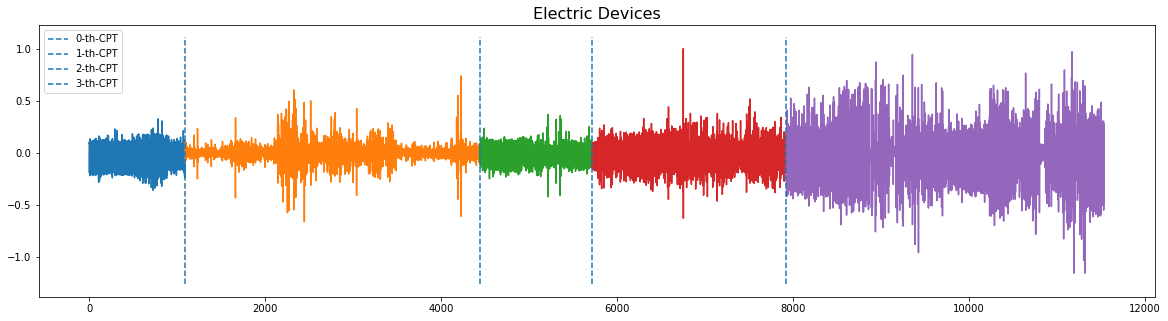

In [3]:
plot_time_series_with_change_points("Electric Devices", y, change_points)

## Segmentation with ClaSP

Classification Score Profile (ClaSP) splits the time series into two sub-sections and the change point is found by training binary classification. The point which identifies this partition best is choosen.
This algorithm needs at least two parameters:
* period length of the time series
* the number of change points

In [4]:
clasp = ClaSPSegmentation(period_length=period, n_cps=5, fmt="sparse")
# Both fitting and predicting from time series data:
found_cps = clasp.fit_predict(y)
profiles = clasp.profiles
scores = clasp.scores
print("The found change points are:", found_cps.to_numpy())

The found change points are: [1038 4525 5719 7883]


From these profiles the highest probability is choosen as change point:
For 5 regions, there are 4 profiles and points.

In [5]:
profiles

array([array([0.66367316, 0.66367316, 0.66367316, ..., 0.52227432, 0.52227432,
              0.52227432])                                                    ,
       array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]),
       array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]),
       array([0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5])], dtype=object)

In [6]:
# Highest scores in every profile:
scores

array([0.71042842, 0.67707336, 0.65436081, 0.61015672])

The positions of these scores will be the change points.

### Comparison of found points and true points:

(<Figure size 1440x1440 with 5 Axes>,
 array([<AxesSubplot:title={'center':'Electric Devices'}>,
        <AxesSubplot:ylabel='ClaSP Score 0. Split'>,
        <AxesSubplot:ylabel='ClaSP Score 1. Split'>,
        <AxesSubplot:ylabel='ClaSP Score 2. Split'>,
        <AxesSubplot:xlabel='split point $s$', ylabel='ClaSP Score 3. Split'>],
       dtype=object))

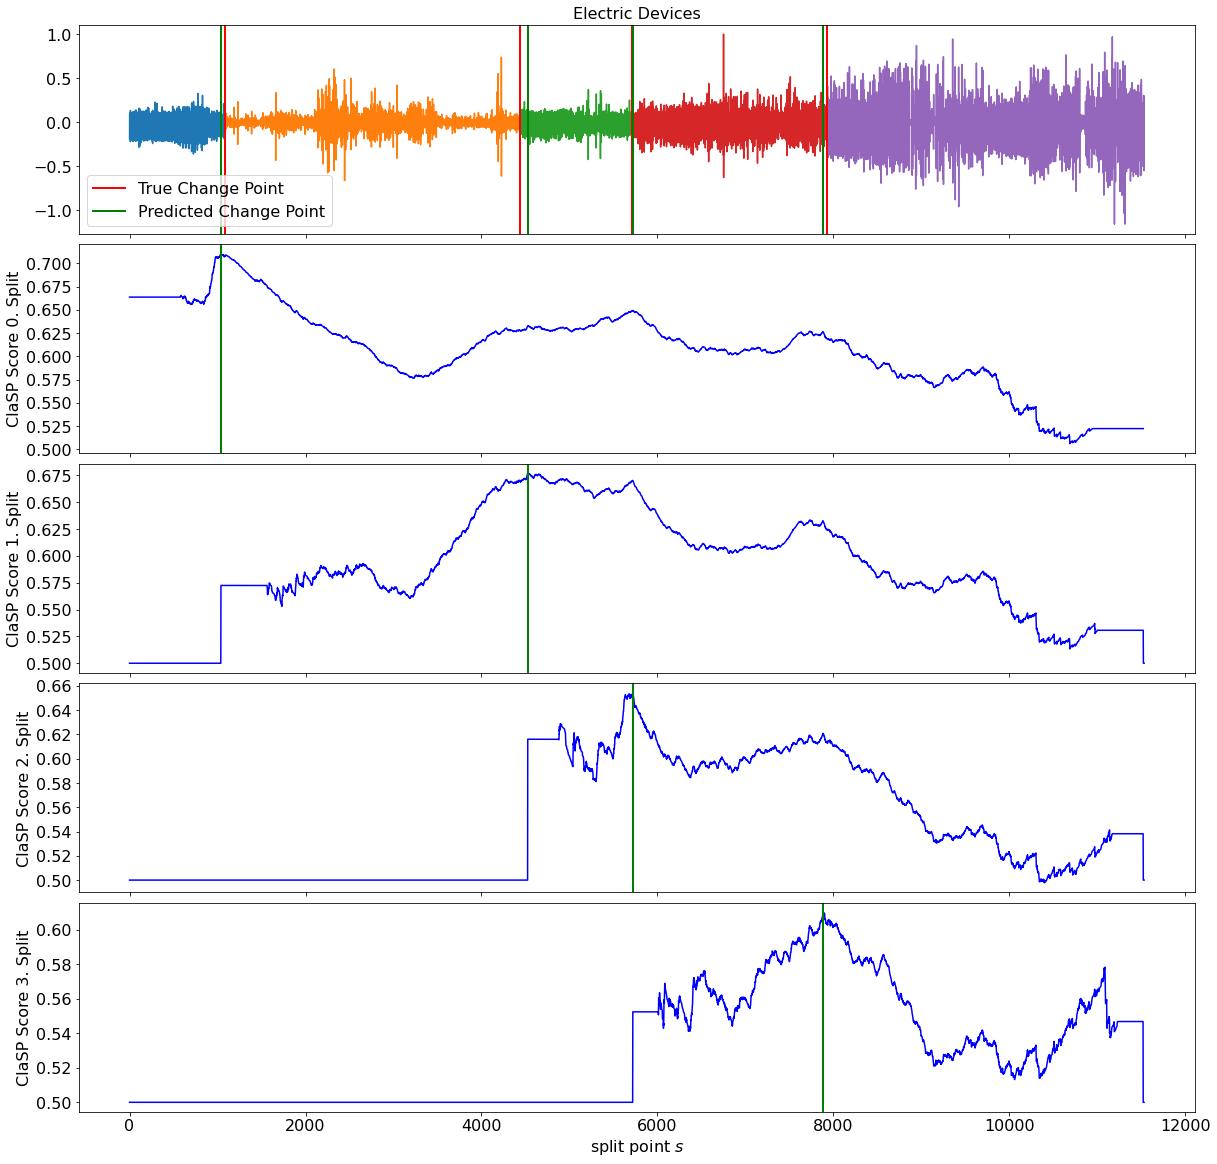

In [7]:
plot_time_series_with_profiles(
    "Electric Devices",
    y,
    profiles,
    change_points,
    found_cps,
)

To choose a proper window length for this algorithm, there is a built-in function to calculate it from the time series.

In [8]:
dominant_period_size = find_dominant_window_sizes(y)
print("Dominant Period:", dominant_period_size)

Dominant Period: 10
